In [1]:
from keras.datasets import mnist

In [2]:
(trainX,trainY),(testX,testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
trainX=trainX.reshape((60000,28,28,1))
testX=testX.reshape((10000,28,28,1))

In [4]:
from keras.utils import to_categorical

In [5]:
trainY=to_categorical(trainY)
testY=to_categorical(testY)

In [6]:
from keras import models
from keras import layers

In [7]:
def mnist_CNN1():
  model=models.Sequential()
  model.add(layers.Conv2D(8,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(10,activation='softmax'))
  return model

In [8]:
CNN1=mnist_CNN1()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
CNN1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        13,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,610 (53.16 KB)

 Trainable params: 13,610 (53.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
CNN1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
CNN1.fit(trainX,trainY,epochs=5,batch_size=512)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.6317 - loss: 19.2964
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9087 - loss: 1.4891
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.9377 - loss: 0.7083
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.9543 - loss: 0.3736
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9636 - loss: 0.2290


In [12]:
test_loss,test_acc = CNN1.evaluate(testX,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9543 - loss: 0.2991


In [13]:
print(test_acc)

0.9603999853134155


In [14]:
def mnist_CNN2():
  model=models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(10,activation='softmax'))
  return model

In [15]:
CNN2=mnist_CNN2()

In [16]:
CNN2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,514 (240.29 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
CNN2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
CNN2.fit(trainX,trainY,epochs=5,batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 106ms/step - accuracy: 0.8290 - loss: 2.0497
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9816 - loss: 0.0629
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.9881 - loss: 0.0389
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9923 - loss: 0.0261
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9928 - loss: 0.0228


In [19]:
test_loss,test_acc = CNN2.evaluate(testX,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9868 - loss: 0.0483


In [20]:
print(test_acc)

0.9890000224113464


In [21]:
from keras.preprocessing.image import load_img

In [22]:
from keras.preprocessing.image import img_to_array

In [23]:
import matplotlib.pyplot as plt

In [24]:
def load_image(filename):
  img=load_img(filename,color_mode='grayscale',target_size=(28,28))
  img=img_to_array(img)
  img=img.reshape(1,28,28,1)
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
CNN1: 5
CNN2: 5


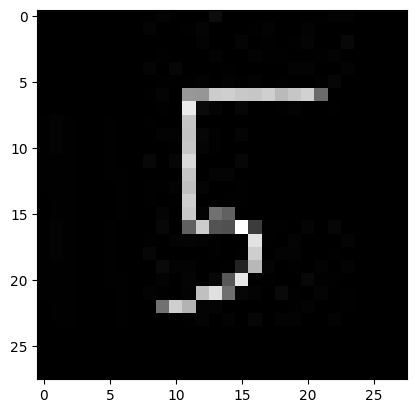

In [30]:
img=load_image('5.jpg')
digit1=CNN1.predict(img)
digit2=CNN2.predict(img)
plt.imshow(img.reshape(28,28),cmap='gray')
print("CNN1:",digit1.argmax())
print("CNN2:",digit2.argmax())